In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [2]:
df_eventos = pd.read_csv('/home/alejandro/Desktop/Orga_Datos_2C_2k18/tp1/fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)

In [3]:
# Ver dias de semana cuantos nuevos ingresantes hay

In [4]:
df_eventos['fecha_evento'] = pd.to_datetime(df_eventos['timestamp'])

In [5]:
df_eventos['fecha_evento_dia_name'] = df_eventos['fecha_evento'].dt.weekday_name

In [6]:
df_eventos['fecha_evento_dia_nameNum'] = df_eventos['fecha_evento'].dt.weekday

In [7]:
df_eventos['hora'] = df_eventos['fecha_evento'].dt.hour

In [8]:
df_eventos_usNuevos = (df_eventos.loc[df_eventos['new_vs_returning'] == "New"])

In [9]:
df_dia_en_usNuevo = (df_eventos_usNuevos.groupby(['fecha_evento_dia_name','fecha_evento_dia_nameNum']).size().reset_index(name='usNuevo'))

In [10]:
df_dia_en_usNuevo = df_dia_en_usNuevo.set_index('fecha_evento_dia_name')

In [11]:
df_dia_en_usNuevo.sort_values(by='fecha_evento_dia_nameNum', inplace=True)
del df_dia_en_usNuevo['fecha_evento_dia_nameNum']

In [12]:
df_dia_en_usNuevo

,usNuevo
fecha_evento_dia_name,
Monday,4020
Tuesday,4665
Wednesday,4393
Thursday,4254
Friday,4135
Saturday,2839
Sunday,2592


In [13]:
df_eventos_usLog = (df_eventos.loc[df_eventos['new_vs_returning'] == "Returning"])

In [14]:
df_dia_en_usLog = (df_eventos_usLog.groupby(['fecha_evento_dia_name','fecha_evento_dia_nameNum']).size().reset_index(name='usLog'))

In [15]:
df_dia_en_usLog = df_dia_en_usLog.set_index('fecha_evento_dia_name')

In [16]:
df_dia_en_usLog.sort_values(by='fecha_evento_dia_nameNum', inplace=True)
del df_dia_en_usLog['fecha_evento_dia_nameNum']

In [17]:
df_dia_en_usLog

,usLog
fecha_evento_dia_name,
Monday,9074
Tuesday,9829
Wednesday,9812
Thursday,9530
Friday,8796
Saturday,6952
Sunday,6487


In [18]:
df_result = df_dia_en_usLog.join(df_dia_en_usNuevo)

In [19]:
df_result

,usLog,usNuevo
fecha_evento_dia_name,,
Monday,9074,4020
Tuesday,9829,4665
Wednesday,9812,4393
Thursday,9530,4254
Friday,8796,4135
Saturday,6952,2839
Sunday,6487,2592


Text(0,0.5,'Cantidad de usuarios')

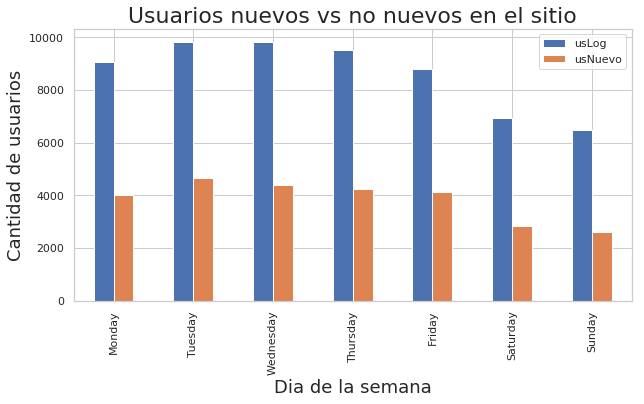

In [20]:
g = df_result.plot.bar(figsize=(10,5))
#df.plot(x="X", y=["A", "B", "C"], kind="bar")
g.set_title("Usuarios nuevos vs no nuevos en el sitio", fontsize=22)
g.set_xlabel("Dia de la semana",fontsize=18)
g.set_ylabel("Cantidad de usuarios", fontsize=18)

In [21]:
# Ver segun las horas la misma comparacion..  cuando suceden los evenos de los nuevos y los no nuevos
# Ver segun las horas en los dias .. cuando se producen mas eventos.. en especial los de ventas..

In [22]:
df_aux = (df_eventos.loc[df_eventos['new_vs_returning'] == "Returning"])

In [23]:
df_aux = df_aux[['fecha_evento_dia_name','hora','event']]

In [24]:
df_aux = df_aux.groupby(['fecha_evento_dia_name','hora']).agg('count')
df_aux.head(5)

event
fecha_evento_dia_name hora       
Friday                0       579
                      1       498
                      2       396
                      3       249
                      4       169

In [25]:
df_auxB = df_aux.copy()

In [26]:
df_asd = df_auxB.unstack(fill_value=0)
df_asd.columns = df_asd.columns.droplevel(0)
#df_asd.reindex(index=df_asd.index[::-1])
df_asd = df_asd[df_asd.columns[::-1]]

Text(102.5,0.5,'Hora')

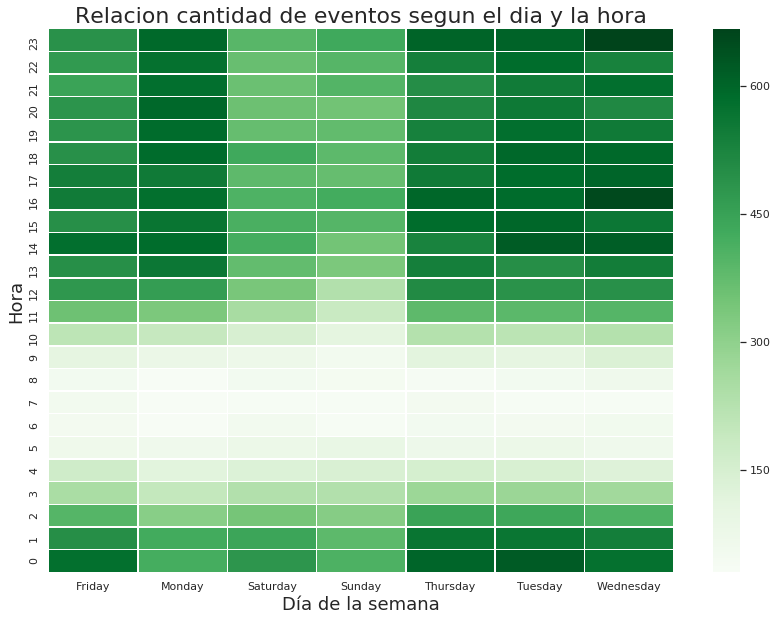

In [27]:
fig, ax = plt.subplots(figsize=(14,10))
g = sns.heatmap(df_asd.T,ax=ax,linewidths=.5,cmap='Greens')
g.set_title("Relacion cantidad de eventos segun el dia y la hora", fontsize=22)
g.set_xlabel("Día de la semana",fontsize=18)
g.set_ylabel("Hora", fontsize=18)

In [28]:
#ver si hay mas de un evento por usuarui en el mismo horario

In [29]:
df_acotado = df_eventos[['person','event','fecha_evento']]

In [30]:
g = df_acotado.groupby(['fecha_evento','person','event']).size().reset_index(name='f_repeticion')

In [31]:
g.sort_values(by='f_repeticion',ascending=False).head()

,fecha_evento,person,event,f_repeticion
693151,2018-05-30 16:50:15,3b5f5f71,viewed product,9
136898,2018-04-04 20:33:41,1830360d,viewed product,8
995650,2018-06-15 14:05:11,d2152e1b,viewed product,8
445953,2018-05-17 13:15:08,7519a032,viewed product,7
193351,2018-04-18 23:35:00,badaab79,viewed product,7


In [32]:
#estos son los que tendria que borrar ... porque son el mismo evento en el mismo momento... deberia ser un mismo evento en un mismo momento..

In [33]:
# --> g = g[g['f_repeticion']<=1] # aca perdi todo lo de los duplicados.. osea los 9 de 9 que habian... 
# capaz puedo hacer una copia primero con todos los mayores a 1 .. y entonces ahi luego agrego esas columnas al final del otro df .. dejando a todos con una unica coincidencia

In [34]:
no_repetidos = (g[g['f_repeticion']>1])[['fecha_evento','person','event']]

In [35]:
no_repetidos.head()

,fecha_evento,person,event
213,2018-01-02 15:57:28,cbaee231,viewed product
226,2018-01-02 18:22:05,4ebea86f,viewed product
948,2018-01-04 11:36:03,1daa389b,viewed product
1093,2018-01-04 15:55:18,4bd64f72,viewed product
1096,2018-01-04 15:56:12,4bd64f72,viewed product


In [36]:
g = g[['fecha_evento','person','event']]
g = g.append(no_repetidos)

In [37]:
g.head()

,fecha_evento,person,event
0,2018-01-01 07:32:26,9250d410,ad campaign hit
1,2018-01-01 07:32:26,9250d410,generic listing
2,2018-01-01 07:32:26,9250d410,search engine hit
3,2018-01-01 07:32:26,9250d410,visited site
4,2018-01-01 09:51:51,8b6dbd1d,visited site


In [38]:
df_eventos_no_rep = g.copy()

In [39]:
df_eventos_no_rep['dia'] = df_eventos_no_rep['fecha_evento'].dt.weekday_name
df_eventos_no_rep['dia_num'] = df_eventos_no_rep['fecha_evento'].dt.weekday
df_eventos_no_rep['hora'] = df_eventos_no_rep['fecha_evento'].dt.hour

In [40]:
df_eventos_no_rep.sort_values(by='dia_num',ascending=True,inplace=True)

In [41]:
#contar ahora entonces cantidad de eventos en el dia segun la hora, haciendo primero un filtro de si la persona es newvo o no ...

In [42]:
df_aux = df_eventos_no_rep.groupby(['dia','hora']).size().reset_index(name='cantidad')

In [43]:
df_aux.head()

,dia,hora,cantidad
0,Friday,0,10356
1,Friday,1,8479
2,Friday,2,7484
3,Friday,3,5387
4,Friday,4,2981


In [44]:
asd = df_eventos_no_rep.groupby(['dia','hora']).agg('count')
asd.head(5)

fecha_evento  person  event  dia_num
dia    hora                                      
Friday 0            10356   10356  10356    10356
       1             8479    8479   8479     8479
       2             7484    7484   7484     7484
       3             5387    5387   5387     5387
       4             2981    2981   2981     2981

In [45]:
df_asd = df_auxB.unstack(fill_value=0)
df_asd.columns = df_asd.columns.droplevel(0)
#df_asd.reindex(index=df_asd.index[::-1])
df_asd = df_asd[df_asd.columns[::-1]]

Text(102.5,0.5,'Hora')

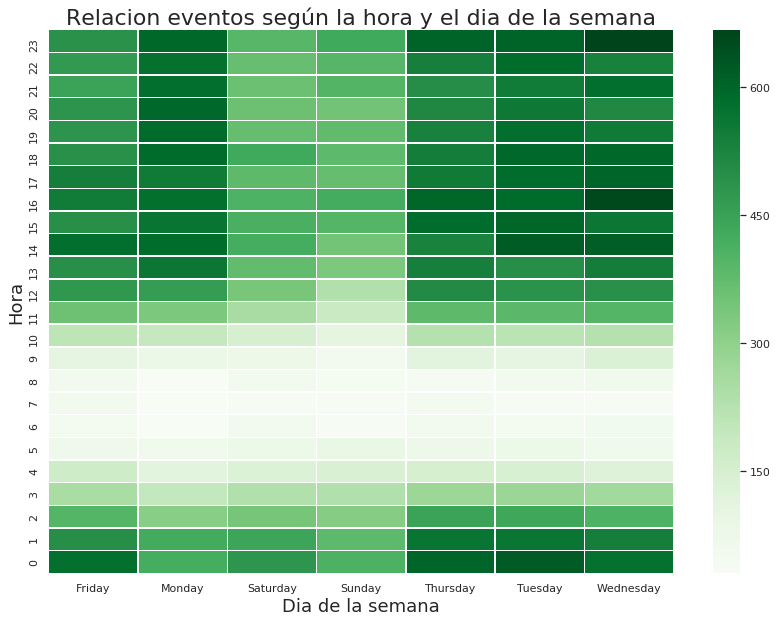

In [46]:
fig, ax = plt.subplots(figsize=(14,10))
g = sns.heatmap(df_asd.T,ax=ax,linewidths=.5,cmap='Greens')
g.set_title("Relacion eventos según la hora y el dia de la semana", fontsize=22)
g.set_xlabel("Dia de la semana",fontsize=18)
g.set_ylabel("Hora", fontsize=18)

In [47]:
df_modVendido = df_eventos[['model','event']]

In [48]:
df_modVendido.head()

,model,event
0,NaN,ad campaign hit
1,NaN,visited site
2,iPhone 5s,viewed product
3,iPhone 5s,checkout
4,Samsung Galaxy S8,viewed product


In [49]:
df_as = df_modVendido[df_modVendido['event']=='conversion']

In [50]:
d = df_as.groupby('model').size().reset_index(name='cantidad')

In [51]:
d.sort_values(by='cantidad',ascending=False,inplace=True)

In [52]:
df_compras_celular = d.copy()

In [53]:
d.head()

,model,cantidad
55,Samsung Galaxy J5,88
102,iPhone 5s,84
103,iPhone 6,71
83,Samsung Galaxy S6 Flat,39
105,iPhone 6S,37


Text(0,0.5,'Cantidad de ventas')

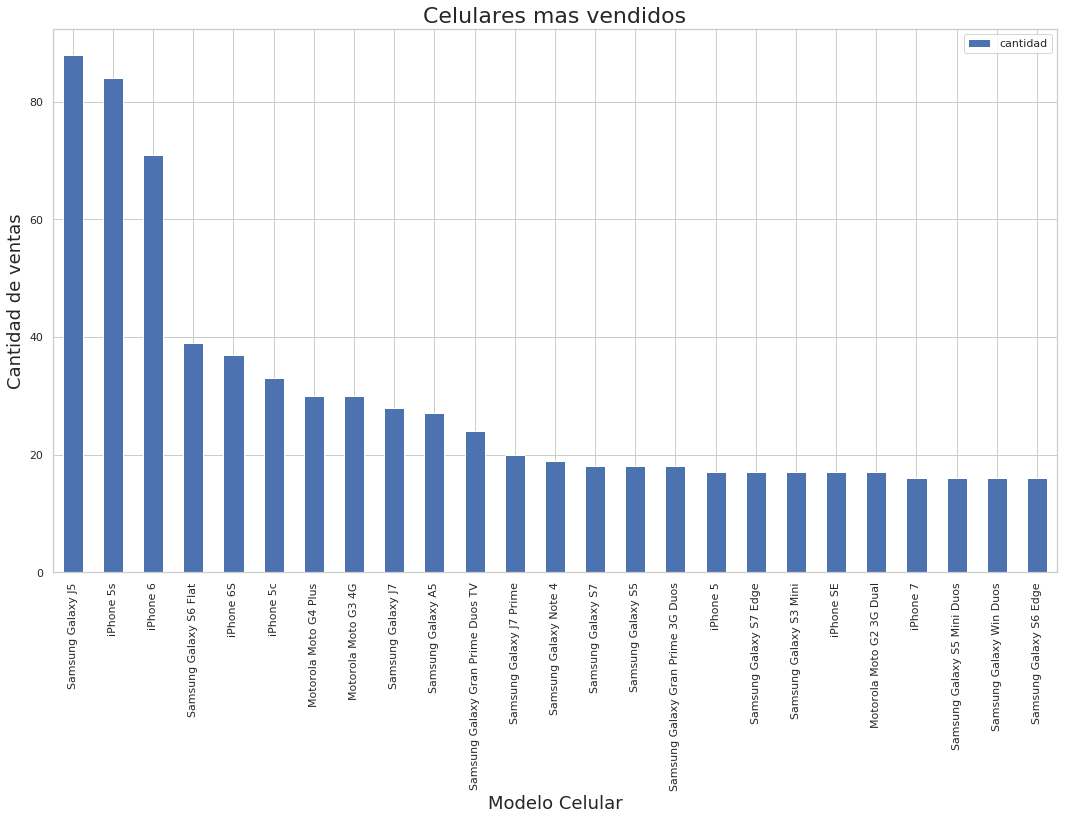

In [54]:
d2 = d[d['cantidad']>15]
d2 = d2.set_index('model')
g = d2.plot.bar(figsize=(18,10))
g.set_title("Celulares mas vendidos", fontsize=22)
g.set_xlabel("Modelo Celular",fontsize=18)
g.set_ylabel("Cantidad de ventas", fontsize=18)

In [55]:
#################################################################################################################

In [56]:
######### analizar cuantos de los que entran a carrito despues lo compran....

In [57]:
df_eventos['anio'] = df_eventos['fecha_evento'].dt.year

In [58]:
df_eventos['mes'] = df_eventos['fecha_evento'].dt.month

In [59]:
df_eventos['dia'] = df_eventos['fecha_evento'].dt.day

In [60]:
df_aux = df_eventos[['person','model','event','fecha_evento','sku']]

In [61]:
df_aux.head()

,person,model,event,fecha_evento,sku
0,0004b0a2,NaN,ad campaign hit,2018-05-31 23:38:05,NaN
1,0004b0a2,NaN,visited site,2018-05-31 23:38:05,NaN
2,0004b0a2,iPhone 5s,viewed product,2018-05-31 23:38:09,2694.0
3,0004b0a2,iPhone 5s,checkout,2018-05-31 23:38:40,2694.0
4,0006a21a,Samsung Galaxy S8,viewed product,2018-05-29 13:29:25,15338.0


In [62]:
df_a = df_aux.loc[df_aux['event']=='conversion']

In [63]:
df_b = df_aux.loc[df_aux['event']=='checkout']

In [64]:
df_merge = pd.merge(df_a,df_b,how='inner',on=['person','sku'])

In [65]:
df_merge.head()

,person,model_x,event_x,fecha_evento_x,sku,model_y,event_y,fecha_evento_y
0,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:15:27
1,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:16:51
2,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:20:17
3,00fdbb4b,Samsung Galaxy S6 Flat,conversion,2018-06-10 14:37:50,3348.0,Samsung Galaxy S6 Flat,checkout,2018-06-11 01:47:34
4,0146a9df,iPhone 5s,conversion,2018-03-16 13:50:25,2694.0,iPhone 5s,checkout,2018-03-16 13:41:36


In [66]:
df_aux = df_merge.loc[df_merge['fecha_evento_x']>=df_merge['fecha_evento_y']]

In [67]:
df_aux.head()

,person,model_x,event_x,fecha_evento_x,sku,model_y,event_y,fecha_evento_y
0,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:15:27
1,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:16:51
2,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:20:17
4,0146a9df,iPhone 5s,conversion,2018-03-16 13:50:25,2694.0,iPhone 5s,checkout,2018-03-16 13:41:36
5,01db2fe6,Samsung Galaxy J5,conversion,2018-02-09 22:07:07,6357.0,Samsung Galaxy J5,checkout,2018-02-09 21:54:43


In [68]:
d_aux = df_aux.groupby(['model_x']).size().reset_index(name='cantidad')

In [69]:
d_aux.head()

,model_x,cantidad
0,Asus Zenfone 5,1
1,LG G3 D855,4
2,LG G4 H815P,2
3,LG G4 H818P,1
4,LG K10,9


Text(0,0.5,'Cantidad de compras')

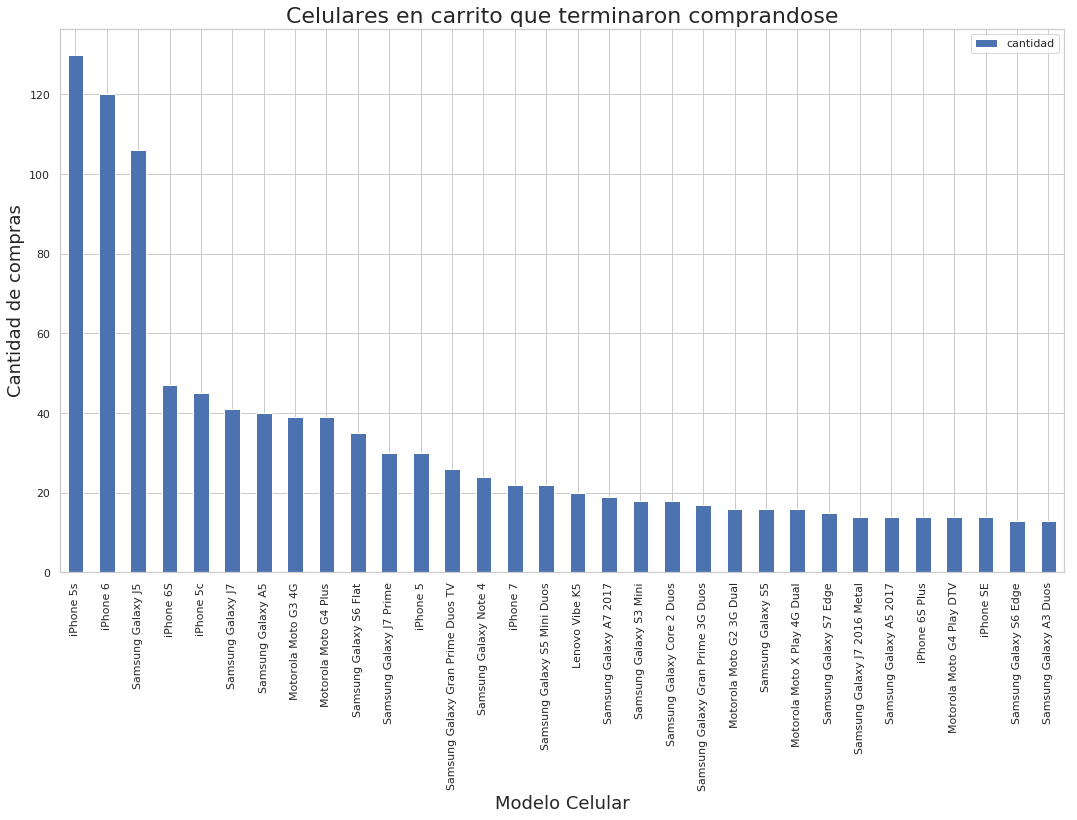

In [70]:
d2 = d_aux[d_aux['cantidad']>12]
d2 = d2.set_index('model_x')
g = d2.sort_values(by='cantidad',ascending=False).plot.bar(figsize=(18,10))
g.set_title("Celulares en carrito que terminaron comprandose", fontsize=22)
g.set_xlabel("Modelo Celular",fontsize=18)
g.set_ylabel("Cantidad de compras", fontsize=18)

In [71]:
df_eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'fecha_evento',
       'fecha_evento_dia_name', 'fecha_evento_dia_nameNum', 'hora', 'anio',
       'mes', 'dia'],
      dtype='object')

In [72]:
#### device_type ####

In [73]:
df_dispositivos = df_eventos[['device_type','event']].copy()

In [74]:
df_dispositivos.head()

,device_type,event
0,NaN,ad campaign hit
1,Smartphone,visited site
2,NaN,viewed product
3,NaN,checkout
4,NaN,viewed product


In [75]:
df_dispositivos['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [76]:
df_g = df_dispositivos.groupby('device_type').size().reset_index(name="cantidad")

In [77]:
df_g= df_g.set_index('device_type')
df_g.head()

,cantidad
device_type,
Computer,41790
Smartphone,44239
Tablet,1234
Unknown,115


Text(0,0.5,'Cantidad de eventos')

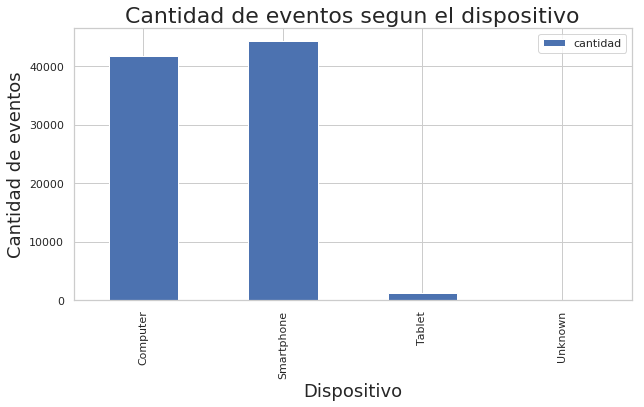

In [78]:
g = df_g.plot.bar(figsize=(10,5))
#df.plot(x="X", y=["A", "B", "C"], kind="bar")
g.set_title(" Cantidad de eventos segun el dispositivo ", fontsize=22)
g.set_xlabel("Dispositivo",fontsize=18)
g.set_ylabel("Cantidad de eventos", fontsize=18)

In [79]:
df_visita = df_eventos[['person','event','fecha_evento','device_type']]

In [80]:
df_visita = df_visita.loc[df_visita['event']=='visited site']

In [81]:
df_b =  df_eventos[['person','event','fecha_evento','device_type']]

In [82]:
df_b = df_b.loc[df_b['event']=='conversion']

In [83]:
del df_visita['event']
del df_b['event']

In [84]:
df_visita.reset_index(inplace=True)
df_b.reset_index(inplace=True)
del df_visita['index']
del df_b['index']

In [85]:
df_visita.head(10)

,person,fecha_evento,device_type
0,0004b0a2,2018-05-31 23:38:05,Smartphone
1,0006a21a,2018-05-29 13:29:26,Smartphone
2,000a54b2,2018-04-09 20:12:31,Computer
3,000a54b2,2018-05-24 11:21:07,Computer
4,00184bf9,2018-04-06 05:12:05,Computer
5,00184bf9,2018-05-04 18:47:03,Computer
6,0019c395,2018-05-17 00:08:56,Smartphone
7,001bb7eb,2018-06-06 18:40:53,Computer
8,001bb7eb,2018-06-08 12:15:33,Computer
9,001f1653,2018-05-29 12:56:08,Smartphone


In [86]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [87]:
for i in range(0,df_b.shape[0]):
    aux = (df_visita.loc[df_visita['person']==df_b['person'][i]])['fecha_evento']
    if(aux.empty):
        continue
    df_b['device_type'][i] = (((df_visita.loc[df_visita['fecha_evento']==nearest(aux,df_b['fecha_evento'][i])]).copy().reset_index())['device_type'][0])
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [88]:
df_b = df_b.loc[df_b['device_type'].isin(['Computer','Smartphone','Tablet'])]

In [89]:
df_disp_compras = df_b.copy()

Text(0,0.5,'Dispositivo')

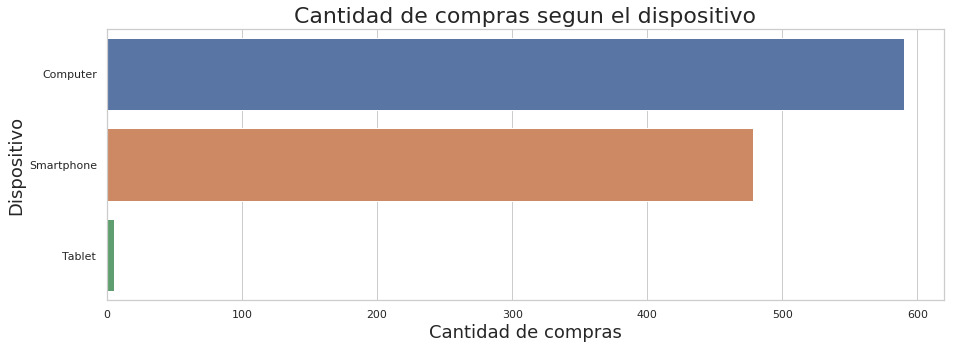

In [90]:
fig,ax = plt.subplots(figsize=(15,5))
g = sns.countplot(y='device_type',order=df_b['device_type'].value_counts().index,data=df_b,ax=ax)
g.set_title(" Cantidad de compras segun el dispositivo ", fontsize=22)
g.set_xlabel("Cantidad de compras",fontsize=18)
g.set_ylabel("Dispositivo", fontsize=18)

In [91]:
###   search_term: ###
# buscar las palabras mas buscadas en su buscador

In [92]:
df_palabras = df_eventos[['search_term']].copy()

In [93]:
df_palabras = df_palabras.dropna()

In [94]:
df_g = df_palabras.groupby('search_term').size().reset_index(name='cantidad')

Text(0,0.5,'Cantidad de veces que la palabra se buscó')

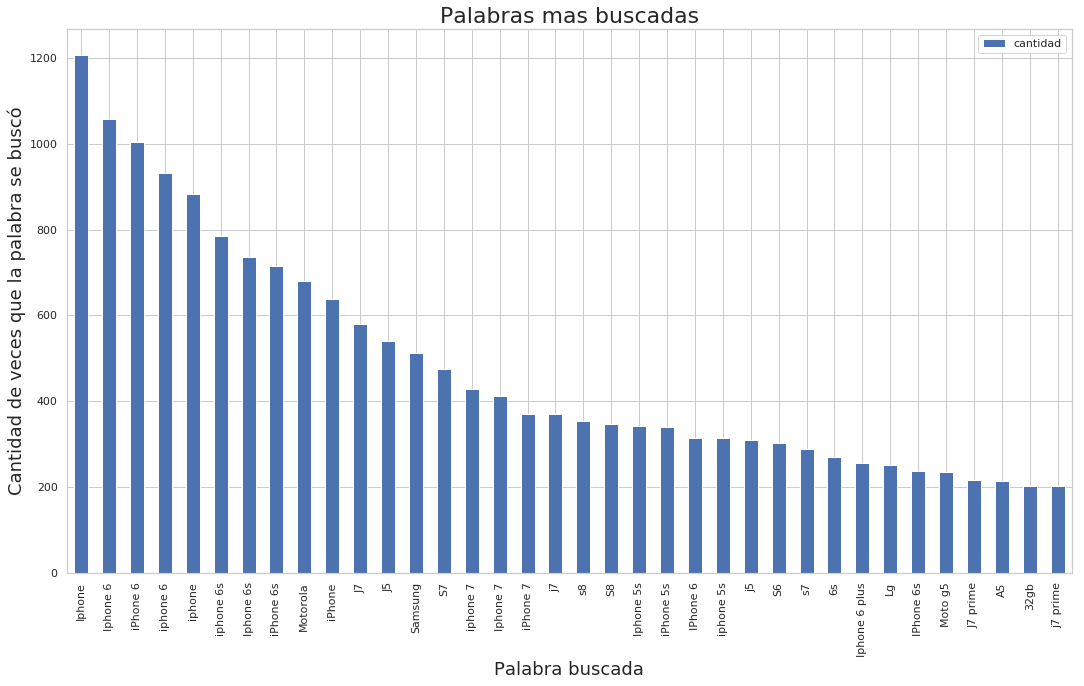

In [95]:
d2 = df_g[df_g['cantidad']>200]
d2 = d2.set_index('search_term')
g = d2.sort_values(by='cantidad',ascending=False).plot.bar(figsize=(18,10))
g.set_title("Palabras mas buscadas", fontsize=22)
g.set_xlabel("Palabra buscada",fontsize=18)
g.set_ylabel("Cantidad de veces que la palabra se buscó", fontsize=18)

In [96]:
df_ventas_dia = df_eventos[['event','fecha_evento_dia_name','fecha_evento_dia_nameNum']].copy()

In [97]:
df_ventas_dia = df_ventas_dia.loc[df_ventas_dia['event']=='conversion']

In [98]:
df_ventas_dia = df_ventas_dia.groupby(['fecha_evento_dia_name','fecha_evento_dia_nameNum']).size().reset_index(name='cantidad')

In [99]:
df_ventas_dia = df_ventas_dia.set_index('fecha_evento_dia_name')

In [100]:
df_ventas_dia.sort_values(by='fecha_evento_dia_nameNum',ascending=True,inplace=True)
del df_ventas_dia['fecha_evento_dia_nameNum']

Text(0,0.5,'Cantidad de ventas')

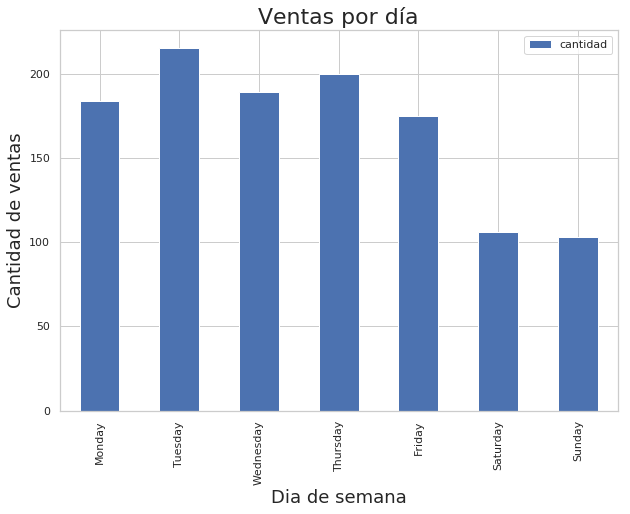

In [101]:
g = df_ventas_dia.plot.bar(figsize=(10,7))
g.set_title("Ventas por día", fontsize=22)
g.set_xlabel("Dia de semana",fontsize=18)
g.set_ylabel("Cantidad de ventas", fontsize=18)

In [102]:
df_ventas_dia = df_eventos[['event','mes']].copy()

In [103]:
df_ventas_dia.sort_values(by='mes',ascending=True,inplace=True)

In [104]:
import calendar
df_ventas_dia['mes'] = df_ventas_dia['mes'].apply(lambda x: calendar.month_abbr[x])

In [105]:
df_ventas_dia = df_ventas_dia.loc[df_ventas_dia['event']=='conversion']

Text(0,0.5,'Cantidad de compras')

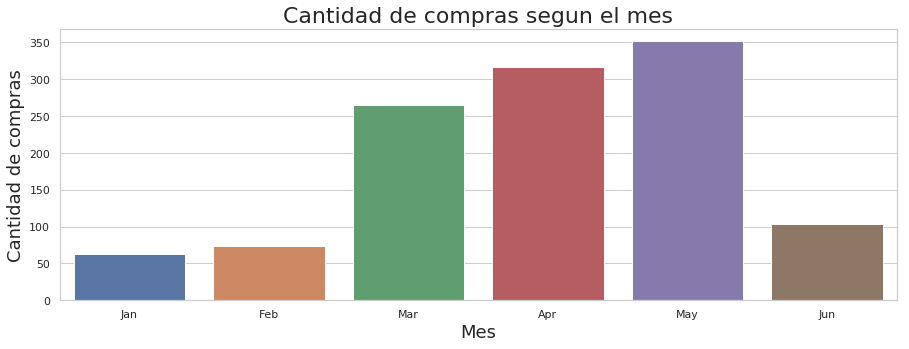

In [106]:
fig,ax = plt.subplots(figsize=(15,5))
g = sns.countplot(x='mes',data=df_ventas_dia,ax=ax)
g.set_title(" Cantidad de compras segun el mes ", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Cantidad de compras", fontsize=18)

In [107]:
df_ventas_dia = df_eventos[['event','hora']].copy()

In [108]:
df_ventas_dia.sort_values(by='hora',ascending=True,inplace=True)

In [109]:
df_ventas_dia = df_ventas_dia.loc[df_ventas_dia['event']=='conversion']

Text(0,0.5,'Cantidad de compras')

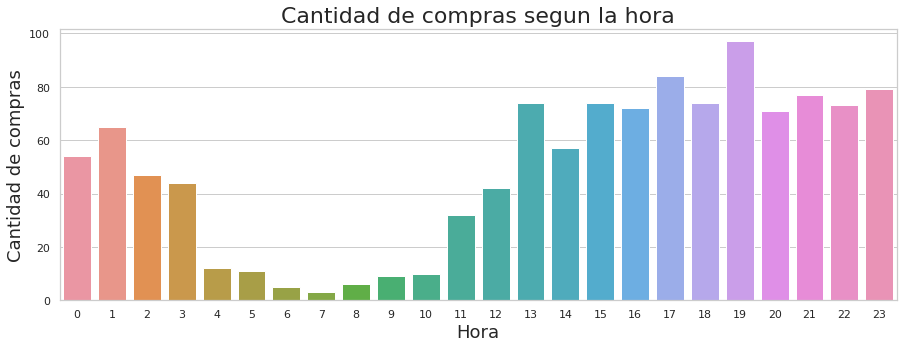

In [110]:
fig,ax = plt.subplots(figsize=(15,5))
g = sns.countplot(x='hora',data=df_ventas_dia,ax=ax)
g.set_title(" Cantidad de compras segun la hora ", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Cantidad de compras", fontsize=18)

In [111]:
df_usuarios = df_eventos[['event','person','new_vs_returning']].copy()

In [112]:
#filtrar los nuevos y los que no... hacer un merge despues con los que hicieron compras... 

In [113]:
df_usuarios = df_usuarios.loc[df_usuarios['event']=='visited site']

In [114]:
del df_usuarios['event']

In [115]:
df_compras_usuario = df_eventos[['event','person']]

In [116]:
df_compras_usuario = df_compras_usuario.loc[df_compras_usuario['event']=='conversion']

In [117]:
df_l = pd.merge(df_compras_usuario,df_usuarios,how='inner',on='person')

In [118]:
del df_l['event']

In [119]:
df_l = df_l.groupby('new_vs_returning').size().reset_index(name='cantidad')

In [120]:
df_l = df_l.set_index('new_vs_returning')

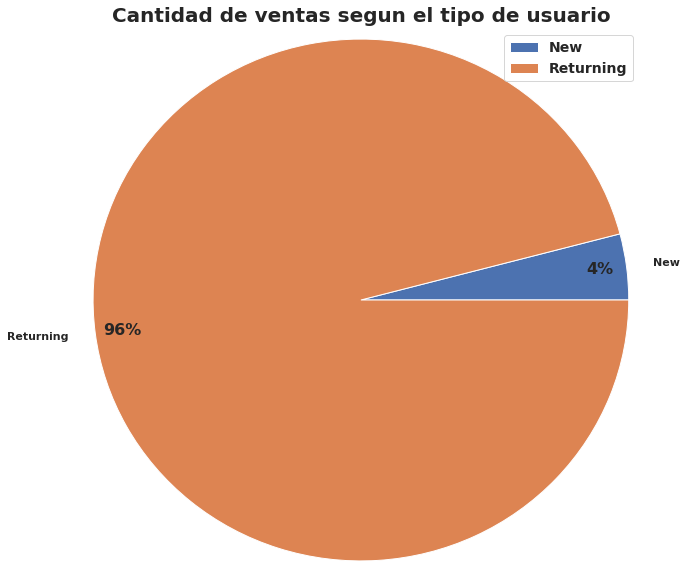

In [121]:
from matplotlib import rc, pyplot as plt

# GENERAL STYLE SETTINGS
font = {'family' : 'DejaVu Sans', 'weight': 'bold', 'size': 16}
rc('font', **font); rc("figure", facecolor="white"); rc('axes', edgecolor='darkgray')

# GRAPH WITH LEGEND
qx = df_l.plot(kind='pie', figsize=(10,10), y='cantidad', autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.legend(loc="upper right", fontsize=14)
qx.set_ylabel("")
plt.title('Cantidad de ventas segun el tipo de usuario', weight='bold', size=20)

plt.show()
plt.clf()
plt.close()

In [122]:
# Relacion entre las palabras mas buscadas y cantidad de ventas de dicha palabra...

In [123]:
df_g.sort_values(by='cantidad',ascending=False,inplace=True)

In [124]:
df_g['search_term'] = df_g['search_term'].str.lower()

In [125]:
df_palabras_lowercase = df_g.groupby('search_term').sum()

In [126]:
df_palabras_lowercase = df_palabras_lowercase.reset_index()

In [127]:
df_compras_celular['model']= df_compras_celular['model'].str.lower()

In [128]:
df_sssss = df_palabras_lowercase.loc[df_palabras_lowercase['search_term'].isin(df_compras_celular['model'])]

In [129]:
df_sssss.sort_values(by='cantidad',ascending=False,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_sssss.head()

,search_term,cantidad
1437,iphone 6,3347
1583,iphone 6s,2576
1688,iphone 7,1354
1383,iphone 5s,1101
1507,iphone 6 plus,756


In [131]:
df_sssss['model'] = df_sssss['search_term']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
del df_sssss['search_term']
del df_sssss['cantidad']

In [133]:
df_merge_palb_compra = pd.merge(df_sssss,df_compras_celular,how='inner',on='model')

In [134]:
df_merge_palb_compra.sort_values(by='cantidad',ascending=False,inplace=True)

In [135]:
df_auxl = df_merge_palb_compra.copy()

In [136]:
df_auxl = df_merge_palb_compra.loc[df_merge_palb_compra['cantidad']>15]

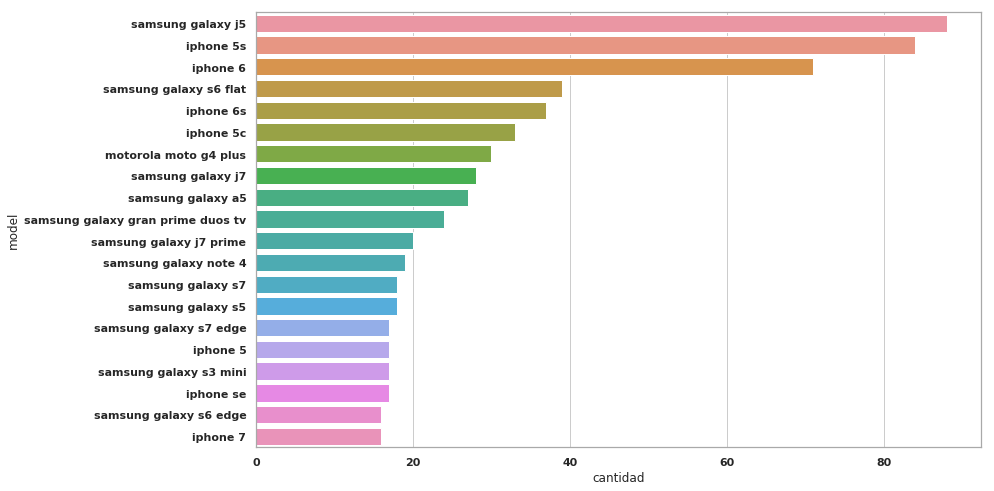

In [137]:
fig,ax = plt.subplots(figsize=(13,8))
sns.barplot(x="cantidad",y="model", data=df_auxl,ax=ax);

In [138]:
#   Analisis de compras seguno S.O tanto en computadora como smartphone  #

In [139]:
df_visita = df_eventos[['person','event','fecha_evento','device_type','operating_system_version']]

In [140]:
df_visita = df_visita.loc[df_visita['event']=='visited site']

In [141]:
df_b =  df_eventos[['person','event','fecha_evento','device_type','operating_system_version']]

In [142]:
df_b = df_b.loc[df_b['event']=='conversion']

In [143]:
del df_visita['event']
del df_b['event']

In [144]:
df_visita.reset_index(inplace=True)
df_b.reset_index(inplace=True)
del df_visita['index']
del df_b['index']

In [145]:
df_visita.head(10)

,person,fecha_evento,device_type,operating_system_version
0,0004b0a2,2018-05-31 23:38:05,Smartphone,Android 6
1,0006a21a,2018-05-29 13:29:26,Smartphone,Android 5.1.1
2,000a54b2,2018-04-09 20:12:31,Computer,Windows 10
3,000a54b2,2018-05-24 11:21:07,Computer,Windows 10
4,00184bf9,2018-04-06 05:12:05,Computer,Windows 10
5,00184bf9,2018-05-04 18:47:03,Computer,Windows 10
6,0019c395,2018-05-17 00:08:56,Smartphone,Android 6
7,001bb7eb,2018-06-06 18:40:53,Computer,Windows 7
8,001bb7eb,2018-06-08 12:15:33,Computer,Windows 7
9,001f1653,2018-05-29 12:56:08,Smartphone,Android 6


In [146]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [147]:
for i in range(0,df_b.shape[0]):
    aux = (df_visita.loc[df_visita['person']==df_b['person'][i]])['fecha_evento']
    if(aux.empty):
        continue
    df_aux = ((df_visita.loc[df_visita['fecha_evento']==nearest(aux,df_b['fecha_evento'][i])]).copy().reset_index())
    df_b['device_type'][i] = (df_aux['device_type'][0])
    df_b['operating_system_version'][i] = (df_aux['operating_system_version'][0])
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [148]:
df_b = df_b.loc[df_b['device_type'].isin(['Computer','Smartphone','Tablet'])]

In [149]:
df_disp_compras = df_b.copy()

Text(0,0.5,'Dispositivo')

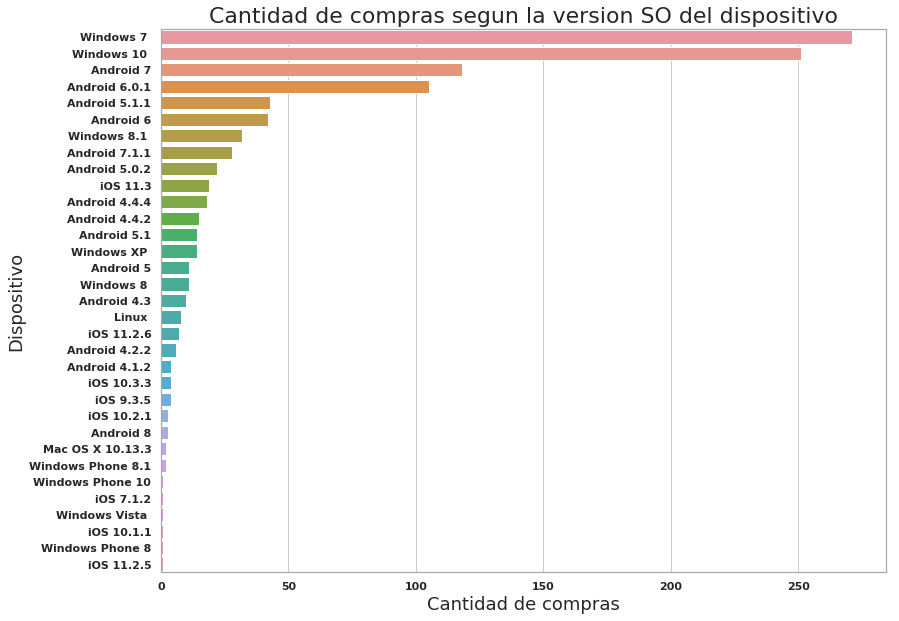

In [151]:
fig,ax = plt.subplots(figsize=(13,10))
g = sns.countplot(y='operating_system_version',data=df_b,order=df_b['operating_system_version'].value_counts().index,ax=ax)
g.set_title(" Cantidad de compras segun la version SO del dispositivo ", fontsize=22)
g.set_xlabel("Cantidad de compras",fontsize=18)
g.set_ylabel("Dispositivo", fontsize=18)